<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Optimization/PCA_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [ ]:
#usara modelo RandomForestClassifier
MODELO = RandomForestClassifier(n_estimators = 50, random_state = 0)
MODELO.fit(X_train,y_train)

print('Accuracy on the training subset:(:.3f)',format(MODELO.score(X_train,y_train)))
print('Accuracy on the training subset:(:.3f)',format(MODELO.score(X_test,y_test)))


Accuracy on the training subset:(:.3f) 1.0
Accuracy on the training subset:(:.3f) 0.965034965034965


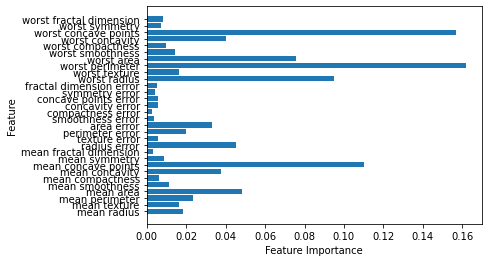

In [ ]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),MODELO.feature_importances_, align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_train)

pca.explained_variance_ratio_
pca.n_components_

1

PCA created 1 component out of 30 original columns

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_train, test_size=0.2, random_state=30)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)


0.872093023255814

Select 3 components

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.9813272 , 0.01673337, 0.00173935])

STILL ONLY 1 COMPONENT EXPLAINS 98%, THE OTHERS MAY BE CORRELATED

In [ ]:
model = PCA(n_components=3).fit(X_train)
X_pc = model.transform(X_train)

# number of components / FEATURES
n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
most_important


[23, 3, 13]

IF ONE HAS 0.98 THE MOST IMPORTANT IS IN POSITION

In [ ]:
[np.abs(model.components_[i]).argmax() for i in range(1)]


[23]